In [1]:
from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()

[wrapper] Added README.md to /home/leem.s/nilearn_data
[wrapper] Dataset created in /home/leem.s/nilearn_data/spm_auditory
[wrapper] Data absent, downloading...
[wrapper] Downloading data from https://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.bids.zip ...
Downloaded 3252224 of 30176409 bytes (10.8%%,    8.5s remaining)
Downloaded 10436608 of 30176409 bytes (34.6%%,    3.9s remaining)
Downloaded 17948672 of 30176409 bytes (59.5%%,    2.1s remaining)
Downloaded 23773184 of 30176409 bytes (78.8%%,    1.1s remaining)
Downloaded 29343744 of 30176409 bytes (97.2%%,    0.1s remaining)
[wrapper]  ...done. (6 seconds, 0 min)

[wrapper] Extracting data from /home/leem.s/nilearn_data/spm_auditory/MoAEpilot.bids.zip...
[wrapper] .. done.



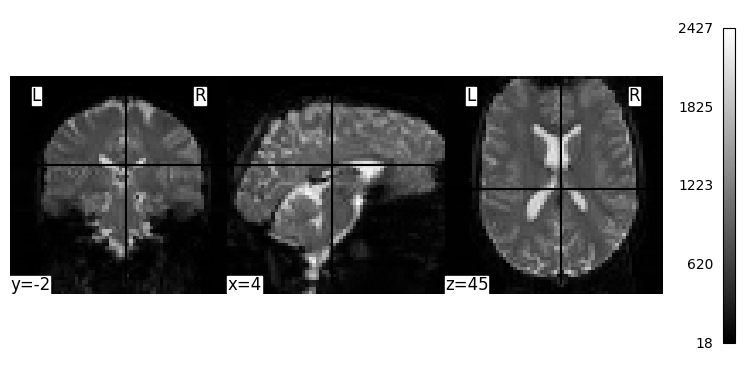

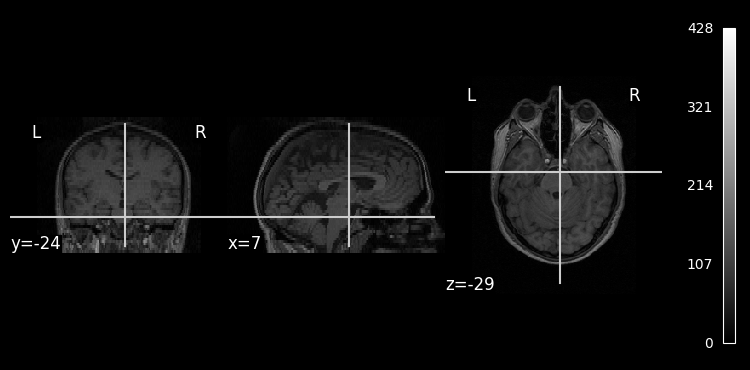

In [3]:
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show

fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)
plot_img(mean_img, cbar_tick_format="%i")

plot_anat(subject_data.anat, cbar_tick_format="%i")

show()

In [8]:
from nilearn.glm.first_level import FirstLevelModel
import pandas as pd

In [9]:
fmri_glm = FirstLevelModel(
    t_r=7,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

events = pd.read_table(subject_data.events)

In [10]:
fmri_glm = fmri_glm.fit(fmri_img, events)
design_matrix = fmri_glm.design_matrices_[0]

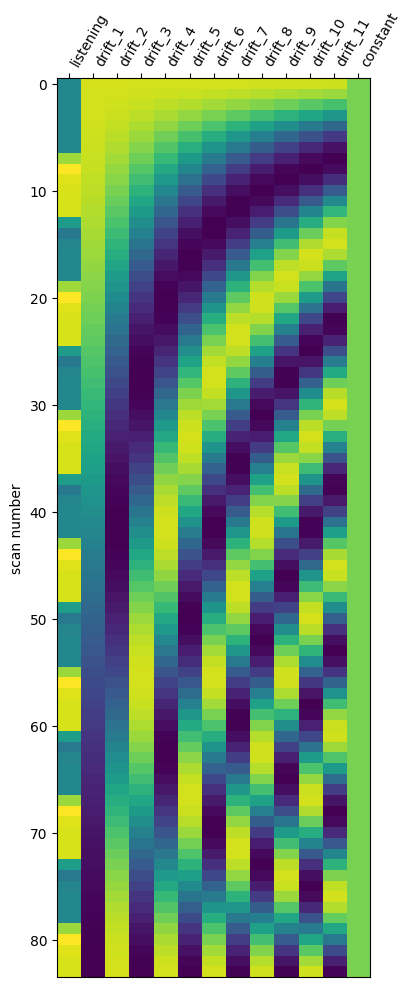

In [11]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

show()


In [12]:
from pathlib import Path

output_dir = Path.cwd() / "results" / "plot_single_subject_single_run"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")

plot_design_matrix(design_matrix, output_file=output_dir / "design_matrix.png")

Output will be saved to: /red/ruogu.fang/leem.s/EmotionVideo/code/results/plot_single_subject_single_run


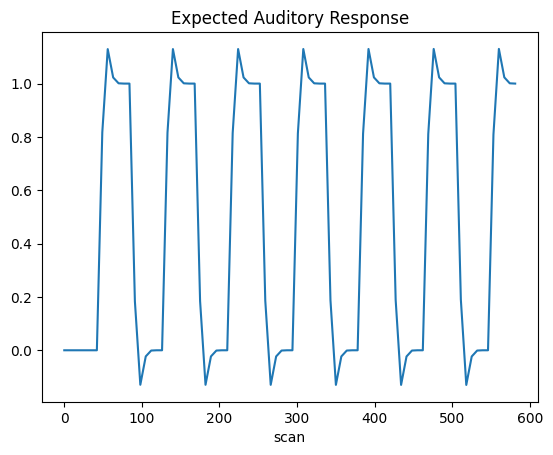

In [13]:
import matplotlib.pyplot as plt

plt.plot(design_matrix["listening"])
plt.xlabel("scan")
plt.title("Expected Auditory Response")

show()

In [14]:
import numpy as np

n_regressors = design_matrix.shape[1]
activation = np.zeros(n_regressors)
activation[0] = 1

<Axes: label='conditions'>

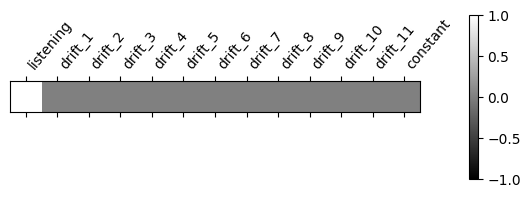

In [15]:
from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(contrast_def=activation, design_matrix=design_matrix)

In [16]:
eff_map = fmri_glm.compute_contrast(activation, output_type="effect_size")

In [17]:
z_map = fmri_glm.compute_contrast(activation, output_type="z_score")

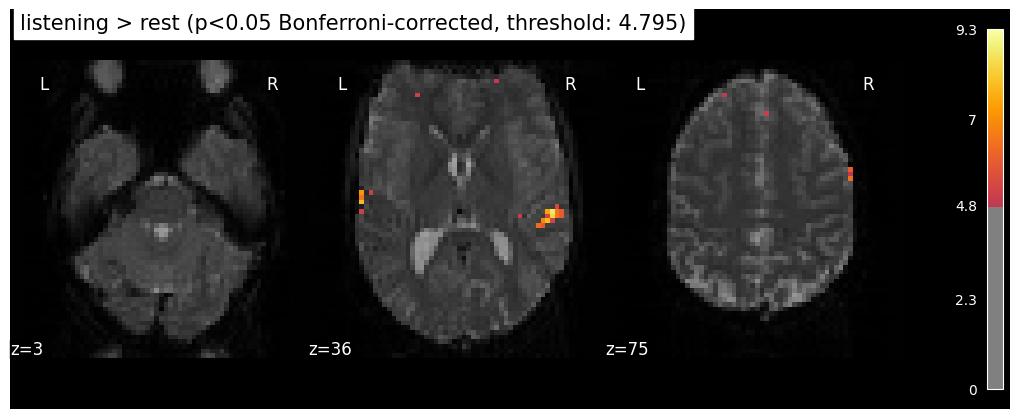

In [22]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni", two_sided=False
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "listening > rest (p<0.05 Bonferroni-corrected, "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()